In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import portfolio_insurance as pi
import requests
import json
import time

# Data

In [2]:
dt = pd.read_csv('./../data/snp2.csv')
dt['yyyy'] = dt['Date'].str[:4]
price = dt[['Date', 'SnP', 'yyyy']]
ret = dt[['Date', 'Return', 'yyyy']]
rf = dt[['Date', 'RF', 'yyyy']]

price = price.set_index('Date')
ret = ret.set_index('Date')
rf = rf.set_index('Date')

vol = ret.rolling(window=12).std()
vol[:11] = vol[11:11+11]
vol['yyyy'] = ret['yyyy']

# Bootstrapping

In [3]:
win = 12
T = win/12
trad_filter = 0.00

In [4]:
strategies = ['SP95']

In [5]:
a = { 'SP95':1.0}
cost = { 'SP95':False}
func1 = { 'SP95':pi.get_E }
func2 = { 'SP95':pi.delta_hedging }

E, res = {}, {}
res_final = {}

for item in strategies:
    res_final[item] = []

In [6]:
start_year = 1928
end_year = start_year + 92
window_size = 1

# Generate the list of lists
year_lists = [[str(year) for year in range(year_i, year_i + window_size)] for year_i in range(start_year, end_year - window_size + 1)]

# Print the lists
# year_lists[-1]

In [7]:
final_w = {}
for item in strategies:
    final_w[item] = {}
    for yyyy_list in list(np.arange(int(year_lists[0][0]),int(year_lists[-1][0]))):
        final_w[item][yyyy_list] = []

from:  1928
to:  1928


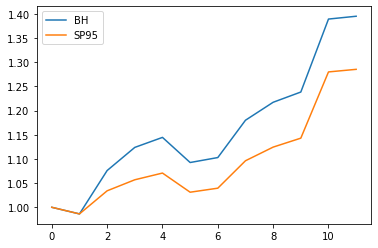

from:  1929
to:  1929


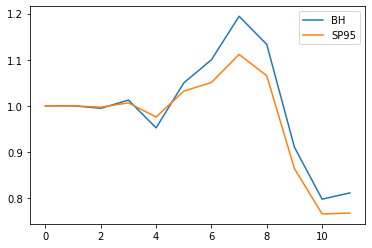

from:  1930
to:  1930


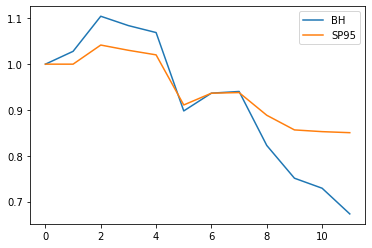

from:  1931
to:  1931


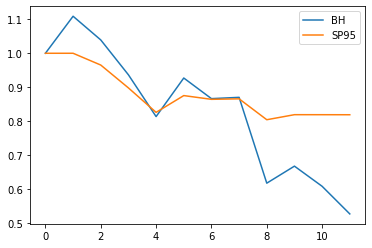

from:  1932
to:  1932


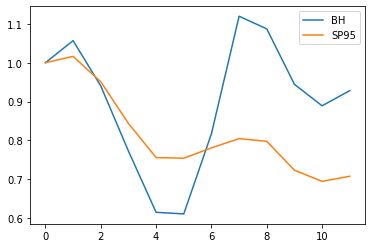

from:  1933
to:  1933


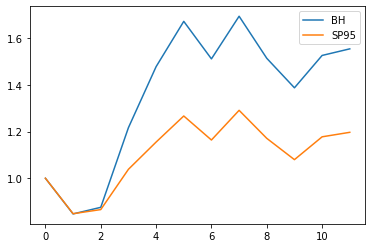

from:  1934
to:  1934


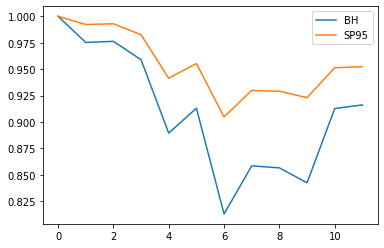

from:  1935
to:  1935


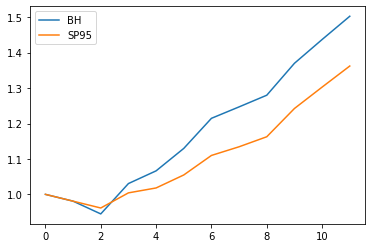

from:  1936
to:  1936


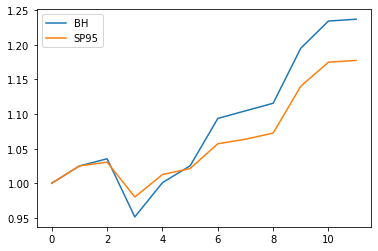

from:  1937
to:  1937


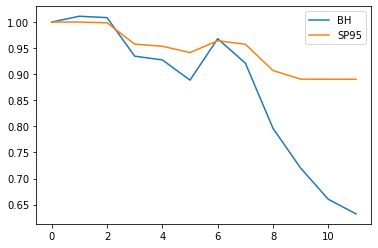

from:  1938
to:  1938


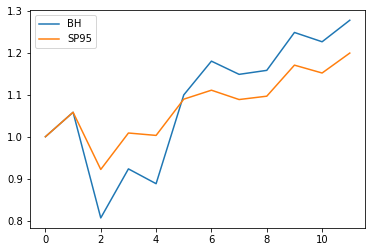

from:  1939
to:  1939


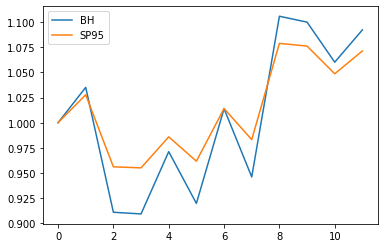

from:  1940
to:  1940


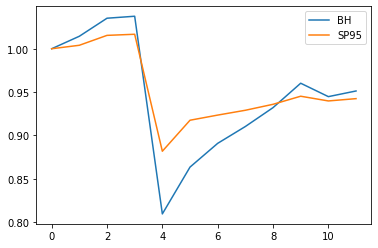

from:  1941
to:  1941


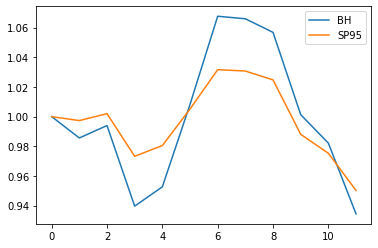

from:  1942
to:  1942


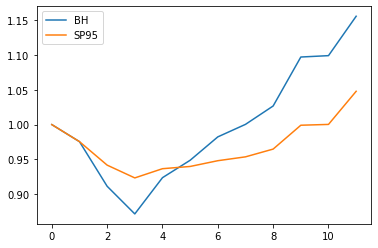

from:  1943
to:  1943


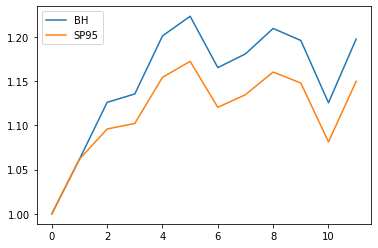

from:  1944
to:  1944


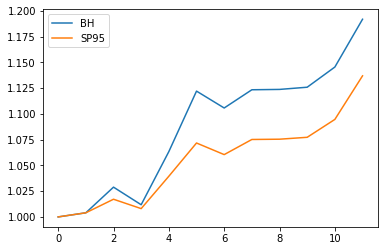

from:  1945
to:  1945


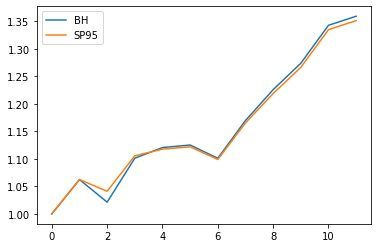

from:  1946
to:  1946


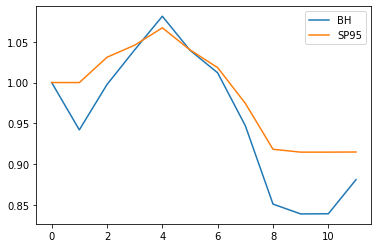

from:  1947
to:  1947


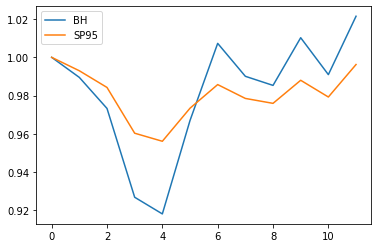

from:  1948
to:  1948


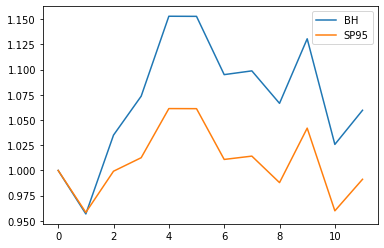

from:  1949
to:  1949


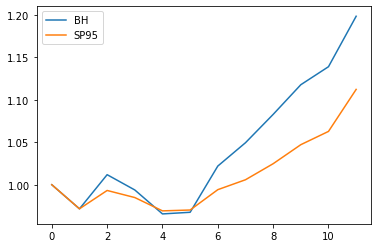

from:  1950
to:  1950


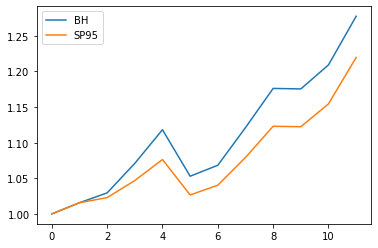

from:  1951
to:  1951


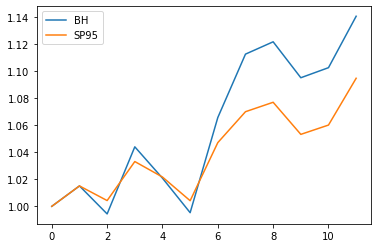

from:  1952
to:  1952


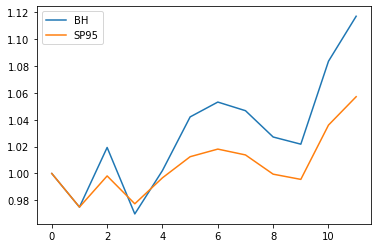

from:  1953
to:  1953


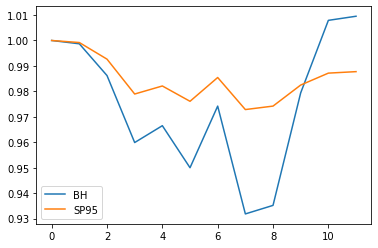

from:  1954
to:  1954


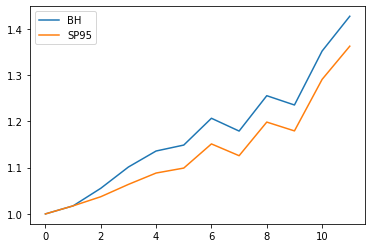

from:  1955
to:  1955


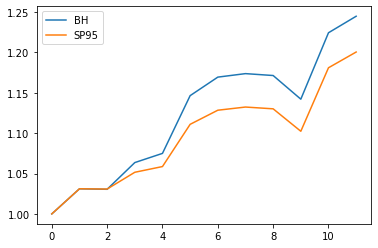

from:  1956
to:  1956


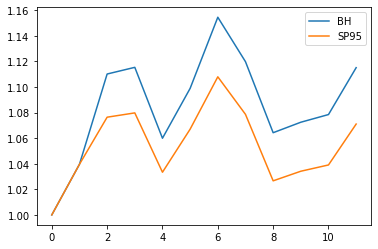

from:  1957
to:  1957


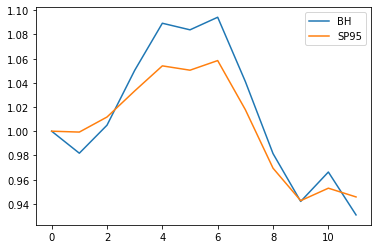

from:  1958
to:  1958


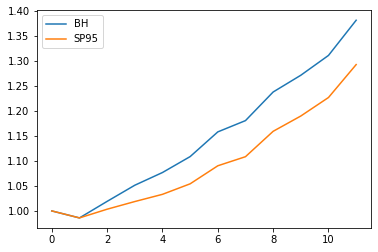

from:  1959
to:  1959


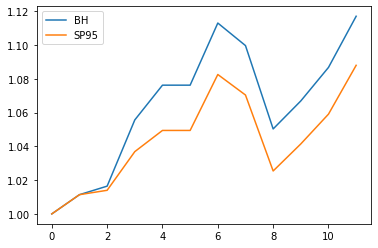

from:  1960
to:  1960


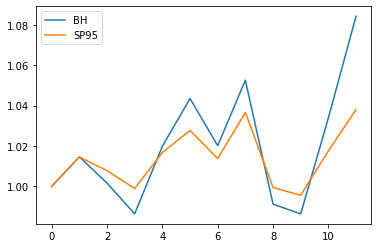

from:  1961
to:  1961


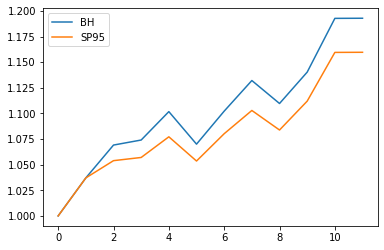

from:  1962
to:  1962


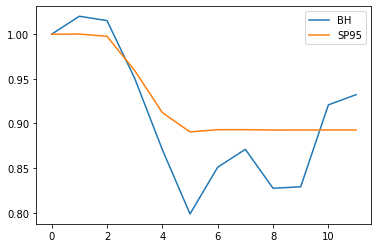

from:  1963
to:  1963


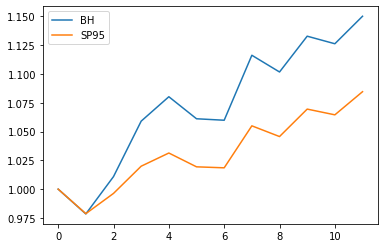

from:  1964
to:  1964


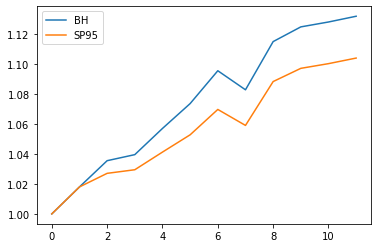

from:  1965
to:  1965


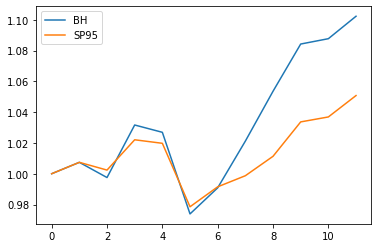

from:  1966
to:  1966


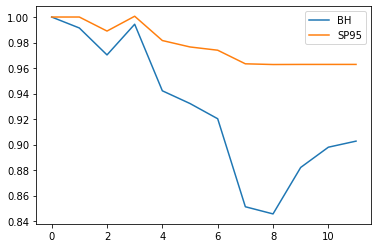

from:  1967
to:  1967


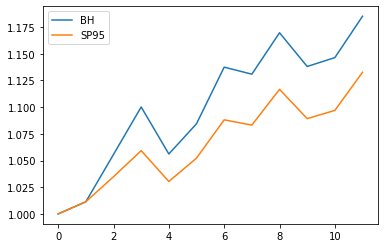

from:  1968
to:  1968


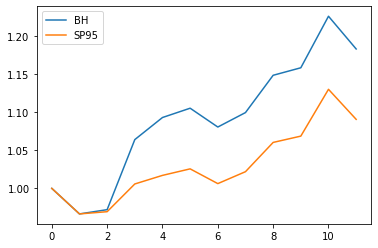

from:  1969
to:  1969


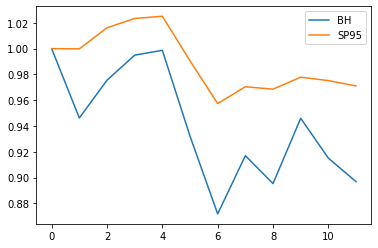

from:  1970
to:  1970


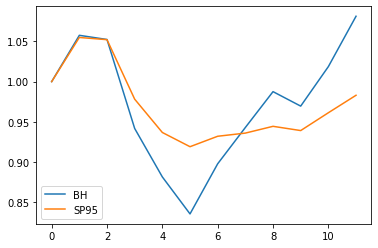

from:  1971
to:  1971


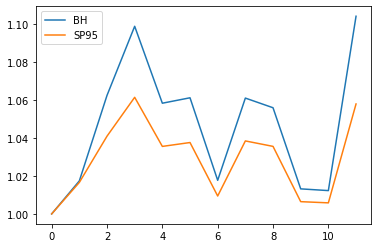

from:  1972
to:  1972


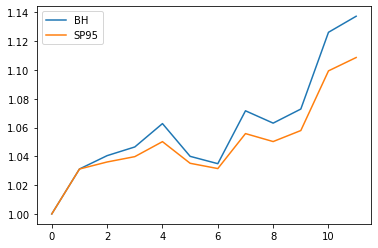

from:  1973
to:  1973


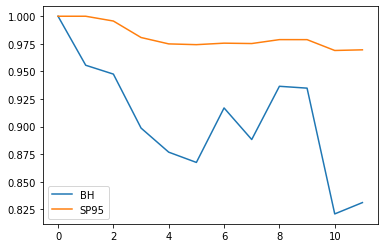

from:  1974
to:  1974


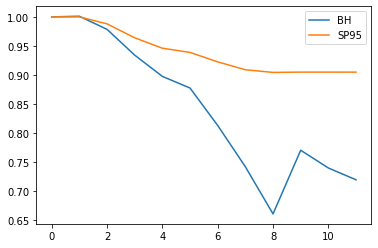

from:  1975
to:  1975


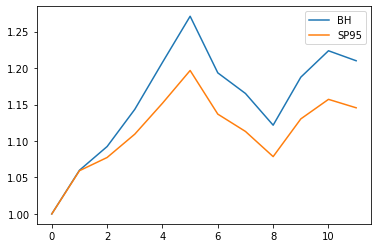

from:  1976
to:  1976


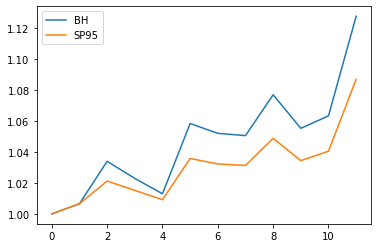

from:  1977
to:  1977


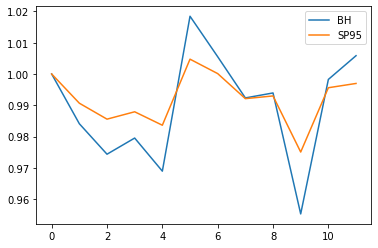

from:  1978
to:  1978


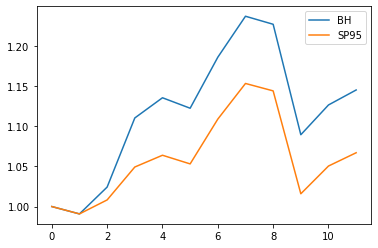

from:  1979
to:  1979


In [8]:

        
for yyyy_list in year_lists[:-1]:
    print('from: ', yyyy_list[0])
    print('to: ', yyyy_list[-1])
    
    price_ = price[price['yyyy'].isin(yyyy_list)]['SnP']
    ret_ = ret[ret['yyyy'].isin(yyyy_list)]['Return']
    rf_ = rf[rf['yyyy'].isin(yyyy_list)]['RF']
    vol_ = vol[vol['yyyy'].isin(yyyy_list)]['Return']
    
    price_ = np.array(price_)
    vol_ = np.array(vol_)
    ret_ = np.array(ret_)
    rf_ = np.array(rf_)
    price_ = price_ / price_[0]
    rf_ = rf_ / 100
    

    for item in strategies:
        if item in ['SP95']:
            E[item] = func1[item](price_, ret_, vol_, T, a[item], rf_, trad_filter)
            res[item] = func2[item](E[item], ret_, price_, rf_, cost[item])

        res_final[item].append(E[item])
        

        plt.plot(price_[:300], label='BH')
        plt.plot(res['SP95'][:300], label='SP95')
        plt.legend()
        plt.show()
        plt.close()
    
        final_w[item][int(yyyy_list[0])] = E[item]
    

In [9]:
final_w_sequence = {'SP95':{}}
years_to_include = 35

for key in final_w['SP95']:
    # Initialize an empty list for each key
    final_w_sequence['SP95'][key] = []
    for i in range(years_to_include):
        # Check if the year exists in the final_w dictionary
        if key + i in final_w['SP95']:
            # Extend the list for the key with the list for the current year
            final_w_sequence['SP95'][key].extend(final_w['SP95'][key + i])




In [10]:
full_year = np.load('./../result/year/full_year.npy', allow_pickle=True).reshape(1)[0]

In [11]:
w_dict = {}
for item in full_year[35][0]:#[1928, 1929, 1930, 1931, 1932, 1936, 1937, 1938, 1945, 1946, 1947, 1961, 1962, 1963, 1967, 1968, 1969, 1970, 1972, 1973, 1974, 1975]:#list(final_w_sequence['SP95'].keys())[:48]:
    w_dict[item] = final_w_sequence['SP95'][item]
    

In [12]:
len(w_dict.keys())

56

In [13]:
pd.DataFrame(w_dict).to_csv('./../w/SP80.csv')